In [9]:
import pandas as pd
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
import folium
from folium.plugins import FastMarkerCluster

In [11]:
locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("Champ de Mars, Paris, France")

In [12]:
print(location.address)
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

Champ de Mars, Avenue Pierre Loti, Quartier du Gros-Caillou, Paris 7e Arrondissement, Paris, Île-de-France, France métropolitaine, 75007, France
Latitude = 48.85614465, Longitude = 2.297820393322227


In [14]:
df = pd.read_csv("addresses.csv")
df.head()

,Address1,Address2,Address3,Address4,Address5
0,129 Franklin St,Apt 117,Cambridge,MA,NaN
1,1667 Massachusetts Ave,NaN,Cambridge,MA,NaN
2,2366 Massachusetts Ave,NaN,Cambridge,MA,NaN
3,79 John F. Kennedy St.,NaN,Cambridge,MA,NaN
4,321 Massachusetts Ave,NaN,Cambridge,MA,NaN


In [15]:
df['ADDRESS'] = df['Address1'].astype(str) + ',' + \
                df['Address3'] + ',' + \
                df['Address4'] + ',' + ' USA'   

df.head()

,Address1,Address2,Address3,Address4,Address5,ADDRESS
0,129 Franklin St,Apt 117,Cambridge,MA,NaN,"129 Franklin St,Cambridge,MA, USA"
1,1667 Massachusetts Ave,NaN,Cambridge,MA,NaN,"1667 Massachusetts Ave,Cambridge,MA, USA"
2,2366 Massachusetts Ave,NaN,Cambridge,MA,NaN,"2366 Massachusetts Ave,Cambridge,MA, USA"
3,79 John F. Kennedy St.,NaN,Cambridge,MA,NaN,"79 John F. Kennedy St.,Cambridge,MA, USA"
4,321 Massachusetts Ave,NaN,Cambridge,MA,NaN,"321 Massachusetts Ave,Cambridge,MA, USA"


In [16]:
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
df['location'] = df['ADDRESS'].apply(geocode)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [18]:
# split point column into latitude, longitude and altitude columns
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)
df.head()

,Address1,Address2,Address3,Address4,Address5,ADDRESS,location,point,latitude,longitude,altitude
0,129 Franklin St,Apt 117,Cambridge,MA,NaN,"129 Franklin St,Cambridge,MA, USA","(Kennedy Biscuit Lofts, 129, Franklin Street, ...","(42.36274985, -71.10118155573551, 0.0)",42.362750,-71.101182,0.0
1,1667 Massachusetts Ave,NaN,Cambridge,MA,NaN,"1667 Massachusetts Ave,Cambridge,MA, USA","(Lizard Lounge, 1667, Massachusetts Avenue, Po...","(42.3821356, -71.1194853, 0.0)",42.382136,-71.119485,0.0
2,2366 Massachusetts Ave,NaN,Cambridge,MA,NaN,"2366 Massachusetts Ave,Cambridge,MA, USA","(L. A. Market, 2366, Massachusetts Avenue, Nor...","(42.3964156, -71.1294002, 0.0)",42.396416,-71.129400,0.0
3,79 John F. Kennedy St.,NaN,Cambridge,MA,NaN,"79 John F. Kennedy St.,Cambridge,MA, USA","(79, John F. Kennedy Street, Old Cambridge, Ca...","(42.37129447737089, -71.12135919651833, 0.0)",42.371294,-71.121359,0.0
4,321 Massachusetts Ave,NaN,Cambridge,MA,NaN,"321 Massachusetts Ave,Cambridge,MA, USA","(Miracle of Science Bar + Grill, 321, Massachu...","(42.3625591, -71.0985916, 0.0)",42.362559,-71.098592,0.0


In [19]:
df_new = df.drop(['Address1','Address1', 'Address3', 'Address4', 
              'ADDRESS', 'location', 'point'], axis=1)

df_new.latitude.isnull().sum()

0

In [27]:
map1 = folium.Map(
    location=[42.362750, -71.101182],
    tiles='cartodbpositron',
    zoom_start=12,
)

In [28]:
df_new.apply(lambda row:folium.Marker(
    location=[row["latitude"], row["longitude"]]).add_to(map1), axis=1)
map1

In [33]:
df_new.head()

,Address2,Address5,latitude,longitude,altitude
0,Apt 117,NaN,42.362750,-71.101182,0.0
1,NaN,NaN,42.382136,-71.119485,0.0
2,NaN,NaN,42.396416,-71.129400,0.0
3,NaN,NaN,42.371294,-71.121359,0.0
4,NaN,NaN,42.362559,-71.098592,0.0


In [37]:
df

,Address1,Address2,Address3,Address4,Address5,ADDRESS,location,point,latitude,longitude,altitude
0,129 Franklin St,Apt 117,Cambridge,MA,NaN,"129 Franklin St,Cambridge,MA, USA","(Kennedy Biscuit Lofts, 129, Franklin Street, ...","(42.36274985, -71.10118155573551, 0.0)",42.362750,-71.101182,0.0
1,1667 Massachusetts Ave,NaN,Cambridge,MA,NaN,"1667 Massachusetts Ave,Cambridge,MA, USA","(Lizard Lounge, 1667, Massachusetts Avenue, Po...","(42.3821356, -71.1194853, 0.0)",42.382136,-71.119485,0.0
2,2366 Massachusetts Ave,NaN,Cambridge,MA,NaN,"2366 Massachusetts Ave,Cambridge,MA, USA","(L. A. Market, 2366, Massachusetts Avenue, Nor...","(42.3964156, -71.1294002, 0.0)",42.396416,-71.129400,0.0
3,79 John F. Kennedy St.,NaN,Cambridge,MA,NaN,"79 John F. Kennedy St.,Cambridge,MA, USA","(79, John F. Kennedy Street, Old Cambridge, Ca...","(42.37129447737089, -71.12135919651833, 0.0)",42.371294,-71.121359,0.0
4,321 Massachusetts Ave,NaN,Cambridge,MA,NaN,"321 Massachusetts Ave,Cambridge,MA, USA","(Miracle of Science Bar + Grill, 321, Massachu...","(42.3625591, -71.0985916, 0.0)",42.362559,-71.098592,0.0
5,55 broadway,NaN,Cambridge,MA,NaN,"55 broadway,Cambridge,MA, USA","(Volpe National Transportation Systems Center,...","(42.36408425, -71.08560964213837, 0.0)",42.364084,-71.085610,0.0


In [40]:

df["color"] = ['green','green','blue','blue','red','red']
df.head()

,Address1,Address2,Address3,Address4,Address5,ADDRESS,location,point,latitude,longitude,altitude,color
0,129 Franklin St,Apt 117,Cambridge,MA,NaN,"129 Franklin St,Cambridge,MA, USA","(Kennedy Biscuit Lofts, 129, Franklin Street, ...","(42.36274985, -71.10118155573551, 0.0)",42.362750,-71.101182,0.0,green
1,1667 Massachusetts Ave,NaN,Cambridge,MA,NaN,"1667 Massachusetts Ave,Cambridge,MA, USA","(Lizard Lounge, 1667, Massachusetts Avenue, Po...","(42.3821356, -71.1194853, 0.0)",42.382136,-71.119485,0.0,green
2,2366 Massachusetts Ave,NaN,Cambridge,MA,NaN,"2366 Massachusetts Ave,Cambridge,MA, USA","(L. A. Market, 2366, Massachusetts Avenue, Nor...","(42.3964156, -71.1294002, 0.0)",42.396416,-71.129400,0.0,blue
3,79 John F. Kennedy St.,NaN,Cambridge,MA,NaN,"79 John F. Kennedy St.,Cambridge,MA, USA","(79, John F. Kennedy Street, Old Cambridge, Ca...","(42.37129447737089, -71.12135919651833, 0.0)",42.371294,-71.121359,0.0,blue
4,321 Massachusetts Ave,NaN,Cambridge,MA,NaN,"321 Massachusetts Ave,Cambridge,MA, USA","(Miracle of Science Bar + Grill, 321, Massachu...","(42.3625591, -71.0985916, 0.0)",42.362559,-71.098592,0.0,red


In [50]:
locations = df[['latitude', 'longitude']]
locationlist = locations.values.tolist()

In [ ]:
locationlist

In [82]:
import folium.plugins
folium.plugins.MarkerCluster()

from folium.plugins import MarkerCluster
MarkerCluster()

map3 = folium.Map(location=[42.362750, -71.101182], tiles='CartoDB positron', zoom_start=12)

marker_cluster = MarkerCluster().add_to(map3)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], 
                  popup='ID:'+df['Address1'][point]+' '+df['color'][point], 
                  icon=folium.Icon(color=df["color"][point], icon_color='white', 
                                   icon='male', angle=0, prefix='fa')).add_to(marker_cluster)
map3

In [73]:
df.latitude

[42.3821356, -71.1194853]

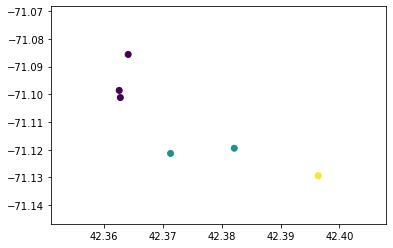

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2, whiten

x, y = kmeans2(whiten(locationlist), 3, iter = 20)  
plt.scatter(df.latitude, df.longitude, c=y);
plt.show()

In [78]:
df['cluster']=y
df['cluster']

0    0
1    1
2    2
3    1
4    0
5    0
Name: cluster, dtype: int32

In [85]:
import folium.plugins
folium.plugins.MarkerCluster()

from folium.plugins import MarkerCluster
MarkerCluster()

map3 = folium.Map(location=[42.362750, -71.101182], tiles='CartoDB positron', zoom_start=12)

marker_cluster = MarkerCluster().add_to(map3)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], 
                  popup='ID:'+df['Address1'][point]+' '+df['color'][point], 
                  icon=folium.Icon(color=df["color"][point], icon_color='white', 
                                   icon='male', angle=0, prefix='fa')).add_to(marker_cluster)
map3